<a href="https://colab.research.google.com/github/yahdiindrawan/covid19-forecasting-system/blob/master/Bidirectional_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# univariate bidirectional lstm example
from numpy import array
from matplotlib import pyplot as plt
import pandas as pd 
import tensorflow as tf

In [0]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 

            Confirmed  Death  Recovered
Date                                   
22/01/2020        555     17         28
23/01/2020        653     18         30
24/01/2020        941     26         36
25/01/2020       1434     42         39
26/01/2020       2118     56         52


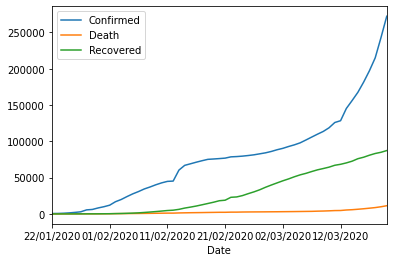

In [5]:
df = pd.read_csv('covid19_dataset.csv', index_col='Date')
print(df.head())
df.plot()

In [0]:
raw_seq = []
for i in range(len(df.Death)):
  raw_seq.append(df.Death[i])

In [13]:
print(raw_seq)

[17, 18, 26, 42, 56, 82, 131, 133, 171, 213, 259, 362, 426, 492, 564, 634, 719, 806, 906, 1013, 1113, 1118, 1371, 1523, 1666, 1770, 1868, 2007, 2122, 2247, 2251, 2458, 2469, 2629, 2708, 2770, 2814, 2872, 2941, 2996, 3085, 3160, 3254, 3348, 3460, 3558, 3802, 3988, 4262, 4615, 4720, 5404, 5819, 6440, 7126, 7905, 8733, 9867, 11299]


In [0]:
# choose a number of time steps
n_steps = 3

In [0]:
# split into samples
X, y = split_sequence(raw_seq, n_steps)

In [0]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [18]:
# define model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [19]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [0]:
length = len(raw_seq)

In [46]:
x_input = array([raw_seq[length-3], raw_seq[length-2], raw_seq[length-1]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat[0][0])

11826.888


In [47]:
last_death = raw_seq[length-1]
predict = yhat
print(last_death)
print(predict)

11299
[[11826.888]]


In [0]:
#Kenaikan kematian tiap hari
kenaikan = []
for i in range(len(df.Death)-1):
  kenaikan.append(df.Death[i+1]-df.Death[i])

In [49]:
print(kenaikan)

[1, 8, 16, 14, 26, 49, 2, 38, 42, 46, 103, 64, 66, 72, 70, 85, 87, 100, 107, 100, 5, 253, 152, 143, 104, 98, 139, 115, 125, 4, 207, 11, 160, 79, 62, 44, 58, 69, 55, 89, 75, 94, 94, 112, 98, 244, 186, 274, 353, 105, 684, 415, 621, 686, 779, 828, 1134, 1432]


In [50]:
kenaikan_prediksi = predict - last_death
print(kenaikan_prediksi)

[[527.8877]]


In [0]:
result = []
for i in range(len(df.Death)-2):
  x_input = array([df.Death[i], df.Death[i+1], df.Death[i+2]])
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=0)
  result.append(yhat[0][0])

In [53]:
print(result)

[42.8202, 56.596596, 81.94525, 130.41801, 132.32237, 170.60559, 221.11624, 260.8357, 340.76718, 427.78873, 495.14865, 561.9719, 636.7825, 715.84216, 804.84656, 903.63586, 1006.65955, 1106.1031, 1206.1766, 1315.4744, 1499.9598, 1685.3687, 1801.867, 1947.6318, 2074.9844, 2208.3477, 2348.261, 2493.1106, 2583.492, 2710.6006, 2808.978, 2942.254, 3050.7583, 3158.7231, 3228.081, 3290.5945, 3358.8828, 3430.0457, 3512.868, 3600.6897, 3700.3296, 3804.3604, 3921.6614, 4040.9001, 4222.241, 4439.274, 4710.776, 5038.737, 5319.9785, 5764.2915, 6299.524, 6952.593, 7647.21, 8470.774, 9375.891, 10462.207, 11826.888]


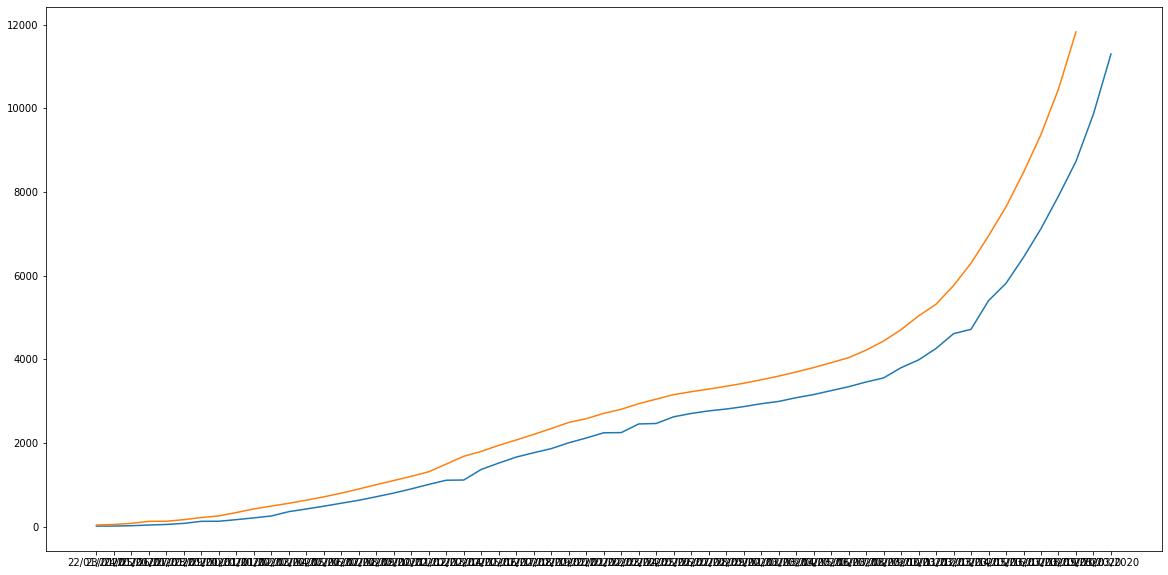

In [60]:
plt.figure(figsize=(20,10))
plt.plot(df.Death)
plt.plot(result)
plt.show()